<a href="https://colab.research.google.com/github/Niveditha-Amarnath/LGMVIP_DS/blob/main/MusicRecommendationSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#IMPORTING DATASETS
ntr = 7000
nts = 3000
data_path = r"/content/train.csv.csv"
train = pd.read_csv(r"/content/train.csv",nrows=ntr)
names=['msno','song_id','source_system_tab','source_screen_name','source_type','target']
test1 = pd.read_csv(r"/content/test.csv",names=names,skiprows=ntr,nrows=nts)
songs = pd.read_csv(r"/content/songs.csv")
members = pd.read_csv(r"/content/members.csv")

In [ ]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [ ]:
songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640.0,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328.0,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781.0,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554.0,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329.0,726,貴族精選,Traditional,Traditional,52.0


In [ ]:
members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


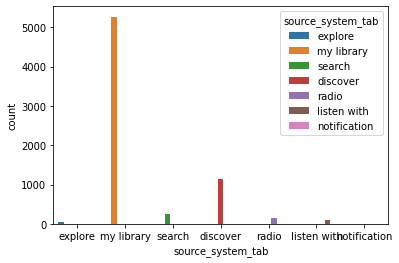

In [ ]:
#DATA VISUALIZATION
sns.countplot(x = train['source_system_tab'],hue=train['source_system_tab'])

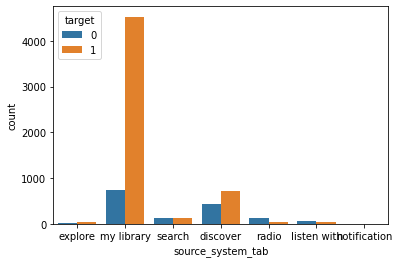

In [ ]:
sns.countplot(x = train['source_system_tab'],hue=train['target'])


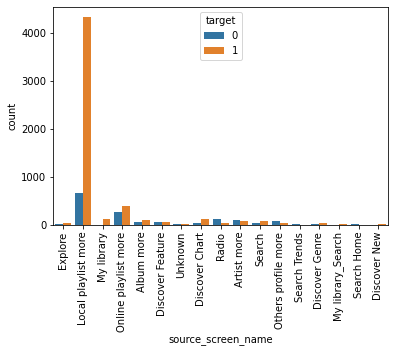

In [ ]:
sns.countplot(x = train['source_screen_name'],hue=train['target'],data = train,orient='v')
plt.xticks(rotation =90)
plt.show()

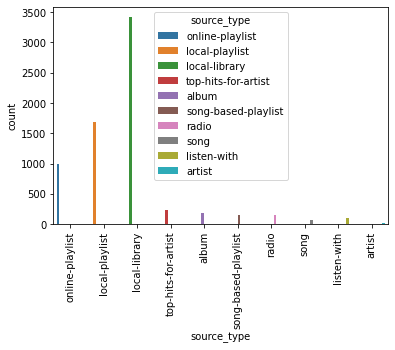

In [ ]:
sns.countplot(x = train['source_type'],hue=train['source_type'],data = train,orient='v')
plt.xticks(rotation =90)
plt.show()

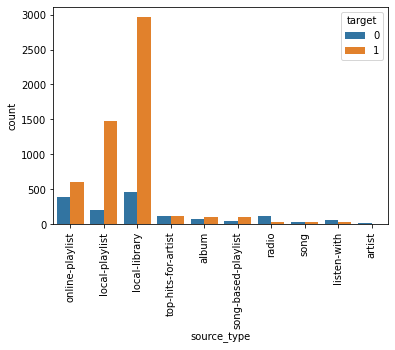

In [ ]:
sns.countplot(x = train['source_type'],hue=train['target'],data = train,orient='v')
plt.xticks(rotation =90)
plt.show()

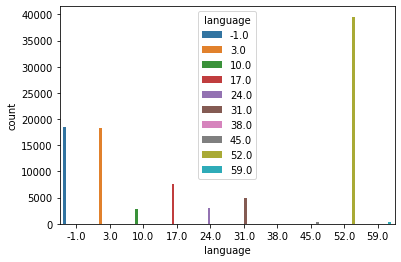

In [ ]:
sns.countplot(x = songs['language'],data =train,hue=songs['language'],orient='v')

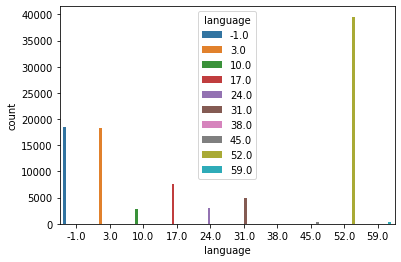

In [ ]:
sns.countplot(x = songs['language'],data =train,hue=songs['language'],orient='v')

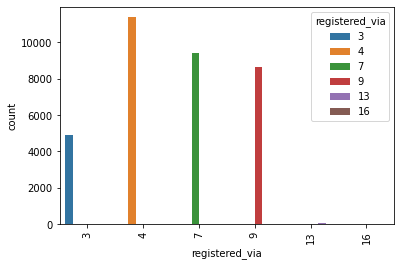

In [ ]:
sns.countplot(x = members['registered_via'],hue=members['registered_via'],orient='v')
plt.xticks(rotation =90)
plt.show()

In [ ]:
#DATA PREPROCESSING AND CLEANING
test = test1.drop(['target'],axis=1)
ytr = np.array(test1['target'])

In [ ]:
test_name = ['id','msno','song_id','source_system_tab',\
             'source_screen_name','source_type']
test['id']=np.arange(nts)
test = test[test_name]

In [ ]:
song_cols = ['song_id', 'artist_name', 'genre_ids', 'song_length', 'language']
train = train.merge(songs[song_cols], on='song_id', how='left')
test = test.merge(songs[song_cols], on='song_id', how='left')

In [ ]:
members['registration_year'] = members['registration_init_time'].apply(lambda x: int(str(x)[0:4]))
members['registration_month'] = members['registration_init_time'].apply(lambda x: int(str(x)[4:6]))
members['registration_date'] = members['registration_init_time'].apply(lambda x: int(str(x)[6:8]))

In [ ]:
members['expiration_year'] = members['expiration_date'].apply(lambda x: int(str(x)[0:4]))
members['expiration_month'] = members['expiration_date'].apply(lambda x: int(str(x)[4:6]))
members['expiration_date'] = members['expiration_date'].apply(lambda x: int(str(x)[6:8]))
members = members.drop(['registration_init_time'], axis=1)

In [ ]:
def members(): 
    members_cols = members.columns
    train = train.merge(members[members_cols], on='msno', how='left')
    test = test.merge(members[members_cols], on='msno', how='left')

In [ ]:
train = train.fillna(-1)
test = test.fillna(-1)

In [ ]:
import gc
del members, songs; gc.collect();

In [ ]:
cols = list(train.columns)
cols.remove('target')

In [ ]:
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
for col in tqdm(cols):
  def train():
    if train[col].dtype == 'object':
        train[col] = train[col].apply(str)
        test[col] = test[col].apply(str)

        le = LabelEncoder()
        train_vals = list(train[col].unique())
        test_vals = list(test[col].unique())
        le.fit(train_vals + test_vals)
        train[col] = le.transform(train[col])
        test[col] = le.transform(test[col])

100%|██████████| 19/19 [00:00<00:00, 147032.80it/s]


In [ ]:
unique_songs = range(max(train['song_id'].max(), test['song_id'].max()))
song_popularity = pd.DataFrame({'song_id': unique_songs, 'popularity':0})

train_sorted = train.sort_values('song_id')
train_sorted.reset_index(drop=True, inplace=True)
test_sorted = test.sort_values('song_id')
test_sorted.reset_index(drop=True, inplace=True)

In [ ]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#MODEL BUILDING
from sklearn.model_selection import train_test_split
import lightgbm as lgb
X = np.array(train.drop(['target'], axis=1))
y = train['target'].values

X_test = np.array(test.drop(['id'], axis=1))
ids = test['id'].values

del train, test; gc.collect();

X_train, X_valid, y_train, y_valid = train_test_split(X, y, \
    test_size=0.1, random_state = 12)
    
del X, y; gc.collect();

d_train = lgb.Dataset(X_train, label=y_train)
d_valid = lgb.Dataset(X_valid, label=y_valid) 

watchlist = [d_train, d_valid]

In [ ]:
#TRYING OUT BASIC CLASSIFICATION MODELS
def predict(m1_model):
    model = m1_model.fit(X_train,y_train)
    print('Training Score : {}'.format(model.score(X_train,y_train)))
    y_pred = model.predict(X_valid)
    #accuracy_score = m1_model.metrics.accuracy_score(y_valid,y_pred)
    #print('Accuracy Score : {}'.format(accuracy_score))
    v_test = model.predict(X_test)
    yhat = (v_test>0.5).astype(int)
    comp = (yhat==ytr).astype(int)
    acc = comp.sum()/comp.size*100
    print("Accuracy on test data for the model", acc)

In [ ]:
def predict(self):
  from sklearn.linear_model import LogisticRegression
  from sklearn.ensemble import RandomForestClassifier
  predict(LogisticRegression())

In [ ]:
def predict():
  predict(RandomForestClassifier())

In [ ]:
#PREDICTION USING LIGHTGBM
params = {}
params['learning_rate'] = 0.4
params['application'] = 'binary'
params['max_depth'] = 15
params['num_leaves'] = 2**8
params['verbosity'] = 0
params['metric'] = 'auc'
def lbg():
  model1 = lgb.train(params, train_set=d_train, num_boost_round=200, valid_sets=watchlist, \
                     early_stopping_rounds=10, verbose_eval=10)

In [ ]:
def model1():
  p_test = model1.predict(X_test)

In [ ]:
def p_test():
  yhat = (p_test>0.5).astype(int)
  comp = (yhat==ytr).astype(int)
  acc = comp.sum()/comp.size*100
  print('The accuracy of lgbm model on test data is: {0:f}%'.format(acc))